## **Libraries**

In [ ]:
import os
import random
from PIL import Image
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, roc_auc_score, confusion_matrix, auc
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## **Download and Explore the Dataset**




In [ ]:
import shutil

zip_file_path = '/content/drive/MyDrive/Capsule Endoscopy-images.zip'
extract_folder_path = '/content/drive/MyDrive'

shutil.unpack_archive(zip_file_path, extract_folder_path, format='zip')

In [ ]:
data_dir = '/content/drive/MyDrive/Capsule Endoscopy-images'
print("The number of classes:", len(os.listdir(data_dir)))
print("")

class_names = os.listdir(data_dir)
class_image_counts = {class_name: 0 for class_name in class_names}
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    image_count = len(os.listdir(class_dir))
    class_image_counts[class_name] = image_count

print("{:<20} {}".format("Class Name", "Image Count"))
print("=" * 35)

for class_name, image_count in class_image_counts.items():
    print("{:<20} {}".format(class_name, image_count))

The number of classes: 14

Class Name           Image Count
Ampulla of vater     10
Angiectasia          866
Blood - fresh        446
Blood - hematin      12
Erosion              506
Erythema             159
Foreign body         776
Ileocecal valve      4189
Lymphangiectasia     592
Normal clean mucosa  34338
Polyp                55
Pylorus              1529
Reduced mucosal view 2906
Ulcer                854


# **Create Dataset**

In [ ]:
batch_size = 32
img_height = 336
img_width = 336

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 47238 files belonging to 14 classes.
Using 37791 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 47238 files belonging to 14 classes.
Using 9447 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Ampulla of vater', 'Angiectasia', 'Blood - fresh', 'Blood - hematin', 'Erosion', 'Erythema', 'Foreign body', 'Ileocecal valve', 'Lymphangiectasia', 'Normal clean mucosa', 'Polyp', 'Pylorus', 'Reduced mucosal view', 'Ulcer']


# **Visualize Data**

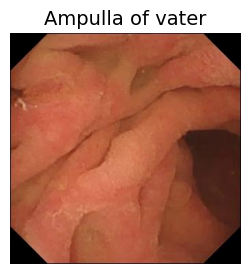

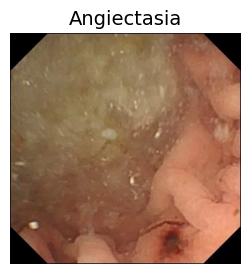

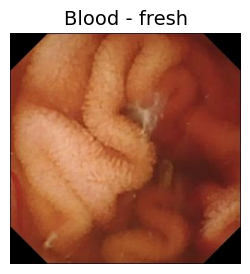

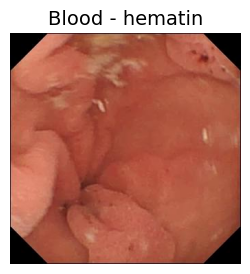

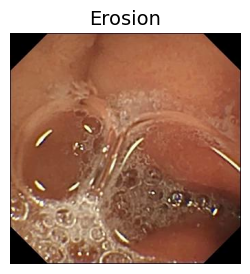

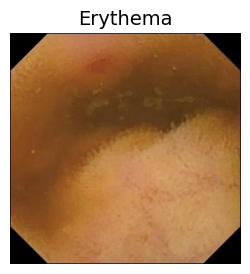

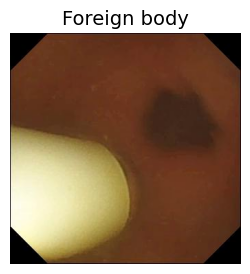

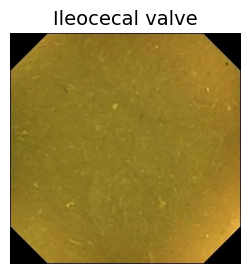

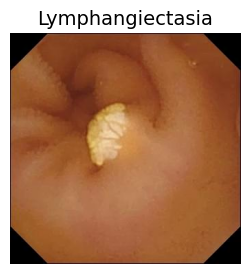

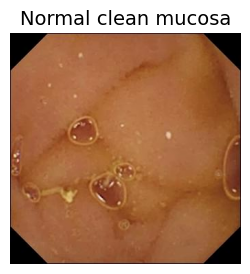

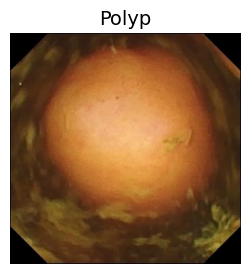

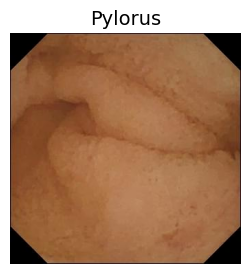

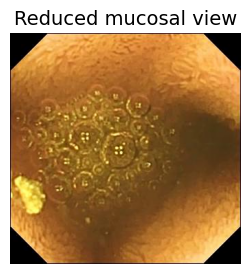

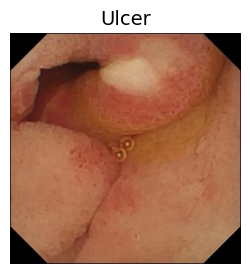

In [ ]:
class_names = os.listdir(data_dir)
class_images = {class_name: [] for class_name in class_names}

for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)
    image_paths = [os.path.join(class_dir, image_name) for image_name in os.listdir(class_dir)]
    class_images[class_name] = image_paths

for class_name, image_paths in class_images.items():
    plt.figure(figsize=(3, 3))
    plt.title(class_name, fontsize=14)

    selected_image = random.choice(image_paths)

    img = Image.open(selected_image)
    plt.imshow(img)
    plt.axis('off')

    plt.show()

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 336, 336, 3)
(32,)


In [ ]:
# Standardize the data
normalization_layer = layers.Rescaling(1./255)

## **A Basic CNN Model**

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# **Compile the Model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Model Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 336, 336, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 336, 336, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 168, 168, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 168, 168, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 84, 84, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 84, 84, 64)        1

# **Train the Model**

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1181/1181 [==============================] - 185s 145ms/step - loss: 0.7518 - accuracy: 0.7936 - val_loss: 0.4582 - val_accuracy: 0.8764
Epoch 2/10
1181/1181 [==============================] - 153s 129ms/step - loss: 0.3637 - accuracy: 0.8958 - val_loss: 0.3100 - val_accuracy: 0.9172
Epoch 3/10
1181/1181 [==============================] - 152s 128ms/step - loss: 0.2111 - accuracy: 0.9368 - val_loss: 0.4647 - val_accuracy: 0.8812
Epoch 4/10
1181/1181 [==============================] - 129s 109ms/step - loss: 0.1231 - accuracy: 0.9635 - val_loss: 0.2950 - val_accuracy: 0.9353
Epoch 5/10
1181/1181 [==============================] - 127s 107ms/step - loss: 0.0841 - accuracy: 0.9743 - val_loss: 0.4047 - val_accuracy: 0.9261
Epoch 6/10
1181/1181 [==============================] - 129s 109ms/step - loss: 0.0679 - accuracy: 0.9792 - val_loss: 0.3847 - val_accuracy: 0.9422
Epoch 7/10
1181/1181 [==============================] - 129s 109ms/step - loss: 0.0565 - accuracy: 0.9828 - val_

In [ ]:
model.save('/content/drive/MyDrive/my_cnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Visualize training results**

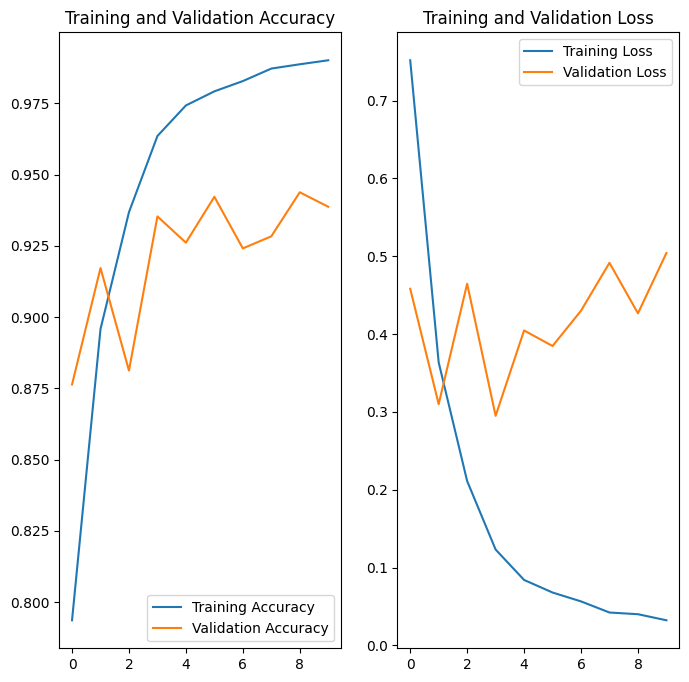

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Metrics**

In [ ]:
y_true = []
y_pred = []

for x, y in val_ds:
    y_true.extend(y.numpy())
    y_pred.extend(np.argmax(model.predict(x), axis=1))

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)

precision = precision_score(y_true, y_pred, average='weighted')
print("Precision:", precision)

1/1 [==============================] - 0s 80ms/step
Accuracy: 0.9387107018100984
Recall: 0.9387107018100984
Precision: 0.9386857431094711


Observation:

1.   Model is overfitting.
2.   Performing Data Augmentation & Adding a Dropout Layer to reduce overfitting


# **Data augmentation**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

# **Dropout**

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## **Compile and train the model**

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 336, 336, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 336, 336, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 336, 336, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 168, 168, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 168, 168, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 84, 84, 32)        0         
 g2D)                                                 

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
1181/1181 [==============================] - 181s 147ms/step - loss: 0.8576 - accuracy: 0.7644 - val_loss: 0.6761 - val_accuracy: 0.8095
Epoch 2/15
1181/1181 [==============================] - 153s 129ms/step - loss: 0.6218 - accuracy: 0.8206 - val_loss: 0.6272 - val_accuracy: 0.8302
Epoch 3/15
1181/1181 [==============================] - 172s 145ms/step - loss: 0.4963 - accuracy: 0.8546 - val_loss: 0.4785 - val_accuracy: 0.8616
Epoch 4/15
1181/1181 [==============================] - 152s 128ms/step - loss: 0.4190 - accuracy: 0.8744 - val_loss: 0.3673 - val_accuracy: 0.8954
Epoch 5/15
1181/1181 [==============================] - 180s 152ms/step - loss: 0.3658 - accuracy: 0.8906 - val_loss: 0.3992 - val_accuracy: 0.8907
Epoch 6/15
1181/1181 [==============================] - 152s 129ms/step - loss: 0.3284 - accuracy: 0.9021 - val_loss: 0.3478 - val_accuracy: 0.8980
Epoch 7/15
1181/1181 [==============================] - 147s 125ms/step - loss: 0.2940 - accuracy: 0.9116 - val_

In [ ]:
model.save("/content/drive/MyDrive/my_cnn_model_augmented.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Visualize training results**

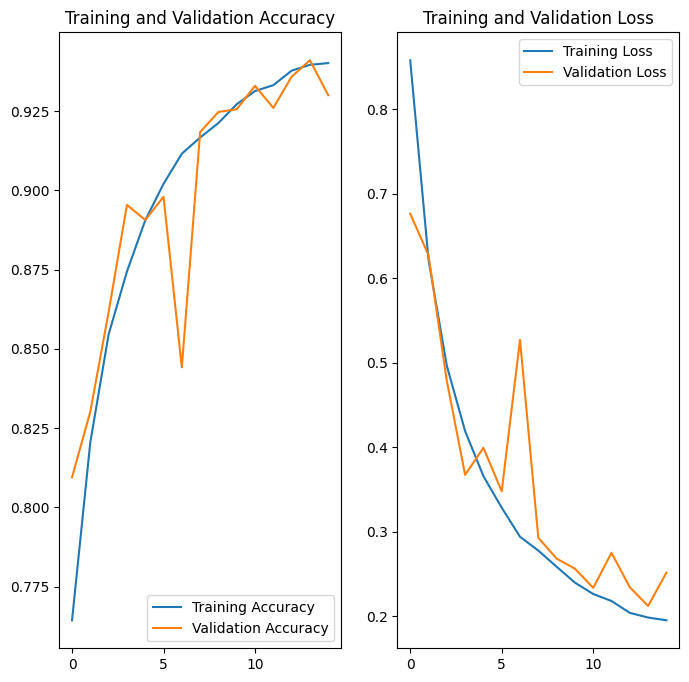

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
y_true = []
y_pred = []

for x, y in val_ds:
    y_true.extend(y.numpy())
    y_pred.extend(np.argmax(model.predict(x), axis=1))

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

recall = recall_score(y_true, y_pred, average='weighted')
print("Recall:", recall)

precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
print("Precision:", precision)

1/1 [==============================] - 0s 111ms/step
Accuracy: 0.93003069757595
Recall: 0.93003069757595
Precision: 0.9287068720915768


1/1 [==============================] - 0s 27ms/step
Accuracy: 0.93003069757595
Recall: 0.93003069757595
Precision: 0.9287068720915768
F1 Score: 0.9267265795899758


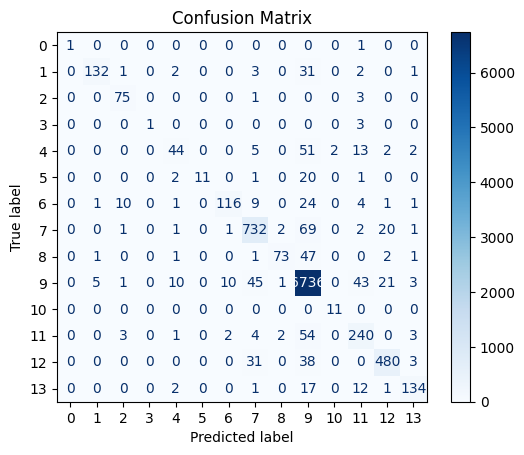

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for x, y in val_ds:
    y_true.extend(y.numpy())
    y_pred.extend(np.argmax(model.predict(x), axis=1))

# Calculate accuracy, recall, precision, and F1 score
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# **Predictions**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/my_cnn_model_augmented.h5')

image_path = '/content/drive/MyDrive/Capsule Endoscopy-images/Polyp/131368cc17e44240_28958.jpg'
img = image.load_img(image_path, target_size=(336, 336))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)

class_names = ['Ampulla of vater', 'Angiectasia', 'Blood - fresh', 'Blood - hematin', 'Erosion', 'Erythema', 'Foreign body', 'Ileocecal valve', 'Lymphangiectasia', 'Normal clean mucosa', 'Polyp', 'Pylorus', 'Reduced mucosal view', 'Ulcer']

predicted_class_index = predictions.argmax(axis=1)
predicted_class_name = class_names[predicted_class_index[0]]
print("Predicted Class:", predicted_class_name)

1/1 [==============================] - 6s 6s/step
Predicted Class: Polyp
